In [2]:
import sys
sys.path.append("..")
from library import *


In [3]:
def get_circuit_results(m, taus):
    energies = np.zeros(len(taus))
    states = np.zeros(shape=(len(taus), 4), dtype=complex)
    ham = H2QCircuit.get_hamilt_op(None).to_matrix()

    for i, tau in enumerate(taus):
        h2qc = H2QCircuit(m=m, tau=tau, trot_reps=10)
        h2qc.run_simulation(num_shots=1)
        state_res = h2qc.final_state
        state_res = normalize(state_res[::2 ** (m * 2)])

        energy = get_energy(state_res, ham)
        energies[i] = energy
        states[i, :] = state_res
        print(f"Simulation {i+1} for tau={tau:.4f} done (energy={energy:.4f})!")
    
    return energies, states

In [6]:
taus = np.linspace(0, 6, 25)
M = 4
ham = H2QCircuit.get_hamilt_op(None).to_matrix()
psi0 = np.ones(4) * 0.5
energies, states = get_circuit_results(M, taus)
gs_energy, gs_state = get_ground_eigh(ham)
fids_op = np.array([get_fidelity(normalize(get_ite(ham, tau) @ psi0), gs_state) for tau in taus])
fids_alg = np.array([get_fidelity(states[i], gs_state) for i in range(len(states))])
energies_op = [0] * len(taus)
for i, tau in enumerate(taus):
    op_ite = get_ite(ham, tau)
    final = normalize(op_ite @ psi0)
    energies_op[i] = get_energy(final, ham)

Simulation 1 for tau=0.0000 done (energy=0.4342)!
Simulation 2 for tau=0.2500 done (energy=0.0178)!
Simulation 3 for tau=0.5000 done (energy=-0.3618)!
Simulation 4 for tau=0.7500 done (energy=-0.6364)!
Simulation 5 for tau=1.0000 done (energy=-0.8037)!
Simulation 6 for tau=1.2500 done (energy=-0.8960)!
Simulation 7 for tau=1.5000 done (energy=-0.9446)!
Simulation 8 for tau=1.7500 done (energy=-0.9698)!
Simulation 9 for tau=2.0000 done (energy=-0.9829)!
Simulation 10 for tau=2.2500 done (energy=-0.9897)!
Simulation 11 for tau=2.5000 done (energy=-0.9933)!
Simulation 12 for tau=2.7500 done (energy=-0.9952)!
Simulation 13 for tau=3.0000 done (energy=-0.9961)!
Simulation 14 for tau=3.2500 done (energy=-0.9964)!
Simulation 15 for tau=3.5000 done (energy=-0.9963)!
Simulation 16 for tau=3.7500 done (energy=-0.9956)!
Simulation 17 for tau=4.0000 done (energy=-0.9943)!
Simulation 18 for tau=4.2500 done (energy=-0.9920)!
Simulation 19 for tau=4.5000 done (energy=-0.9881)!
Simulation 20 for tau=4

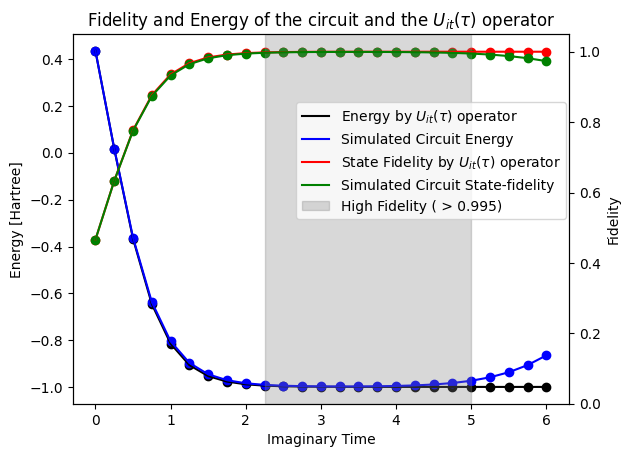

In [39]:
   
colors = ["black", "blue", "red", "green"]   
   
plot1 = plt.plot(taus, energies_op, label=r"Energy by $U_{it}(\tau)$ operator", color=colors[0]);
plt.scatter(taus, energies_op, color=colors[0]);
plot2 = plt.plot(taus, energies, label="Simulated Circuit Energy", color=colors[1]);
plt.scatter(taus, energies, color=colors[1]);

plt.xlabel(r"Imaginary Time")
plt.ylabel(r"Energy [Hartree]")

y2 = plt.gca().twinx()
y2.set_ylim(0, 1.05)
y2.set_yticks(np.arange(0, 1.1, 0.2))
y2.set_yticklabels([f"{x:.1f}" for x in np.arange(0, 1.1, 0.2)])
y2.set_ylabel("Fidelity")
plot3 = plt.plot(taus, np.array(fids_op), label=r"State Fidelity by $U_{it}(\tau)$ operator", color=colors[2]);
plt.scatter(taus, np.array(fids_op), color=colors[2]);
plot4 = plt.plot(taus, np.array(fids_alg), label="Simulated Circuit State-fidelity", color=colors[3]);
plt.scatter(taus, np.array(fids_alg), color=colors[3]);
first_high_fid = np.where(fids_alg > 0.995)[0][0]
last_high_fid = len(fids_alg) - np.where(fids_alg[::-1] > 0.995)[0][0]
plot5 = plt.axvspan(taus[first_high_fid], taus[last_high_fid], alpha=0.3, color='gray', label="High Fidelity ( > 0.995)")
plt.legend(loc=(0.45, 0.5), handles=[plot1[0], plot2[0], plot3[0], plot4[0], plot5])

plt.title(r"Fidelity and Energy of the circuit and the $U_{it}(\tau)$ operator");

# plt.savefig("fig4.svg")